## Introduction

**[This, here on kaggle](https://www.kaggle.com/code/bextuychiev/how-to-touch-into-heart-of-matplotlib-a-create)** is a great article on the internal workings of matplotlib.  
A sound understanding of underlying ___Artist layer___ will help in tweaking each component of a plot, from a single dot to entire containers.  
Refer this and keep adding more notes to this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


### 1. Blank plot

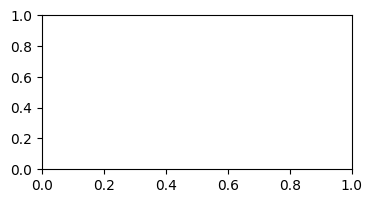

In [5]:
#creates a blank container for a plot
#fig = plt.figure()
#used to add blank X-Y lines
#ax = fig.add_axes()
fig, ax = plt.subplots(figsize = (4,2))
plt.show()

- Each object in matplotlib like figure container (fig), X-Y coordinates object (ax), dots in scatter plot etc. contains several functions.
- The entire list can be seen using the function **`dir(object-name)`**.
- The **`get_*()`** functions are used to control each component of this object.
- For e.g. **`fig.get_axes()`** can be used to get the X-Y axes of the plot.

### 2. How to check all available attributes & functions for MPL object?

In [33]:
#to see all functions available in fig class
#total 243 functions & attributes available. View only first 45
print(dir(fig)[1:45])

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_axes_internal', '_agg_filter', '_align_label_groups', '_alpha', '_animated', '_axobservers', '_axstack', '_button_pick_id', '_callbacks', '_canvas_callbacks', '_check_layout_engines_compat', '_clipon', '_clippath', '_cm_set', '_different_canvas', '_dpi']


In [35]:
#all attributes and functions available for "ax"
#printing only first 25 (there are 445)
print(dir(ax)[1:45])

['_AxesBase__clear', '_PROPERTIES_EXCLUDED_FROM_SET', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_text', '_adjustable', '_agg_filter', '_alias_map', '_alpha', '_anchor', '_animated', '_aspect', '_autotitlepos', '_axes', '_axes_locator', '_axis_map', '_axis_names', '_axisbelow']


### 3. Dummy Plot

In [39]:
# Create the data to plot
X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

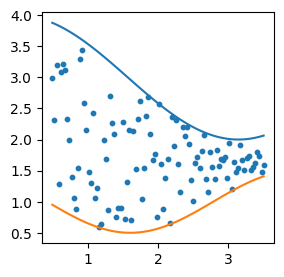

In [45]:
#demo plot
fig, ax = plt.subplots(1,1, figsize = (3,3))
ax.scatter(X, Y3, s=10)
ax.plot(X, Y1)
ax.plot(X, Y2)
plt.show()

### 4. How to see all available features/arguments for an object? 
___(Here, fig and ax refers to the plot above.)___

#### 4a. Figure container features

In [41]:
#Important function to see all available arguments in an object
plt.setp(fig)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  canvas: FigureCanvas
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  constrained_layout: unknown
  constrained_layout_pads: unknown
  dpi: float
  edgecolor: :mpltype:`color`
  facecolor: :mpltype:`color`
  figheight: float
  figure: `~matplotlib.figure.Figure`
  figwidth: float
  frameon: bool
  gid: str
  in_layout: bool
  label: object
  layout_engine: {'constrained', 'compressed', 'tight', 'none', `.LayoutEngine`, None}
  linewidth: number
  mouseover: bool
  path_effects: list of `.AbstractPathEffect`
  picker: None or bool or float or callable
  rasterized: bool
  size_inches: (float, float) or float
  sketch_params: (scale: float, length: float, randomness: float)
  snap: bool or None
  tight_lay

#### 4b. X-Y axis features

In [42]:
#to see all available options
plt.setp(ax)

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  forward_navigation_events: bool or "auto"
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: list of `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom

### 5. How to extract feature-values of current figure's components?

#### 5a. Current X-axis extent

In [43]:
#what is the current extent of x-axis?
plt.getp(ax, "xlim")

(np.float64(0.35), np.float64(3.65))

#### 5b. Current Y-axis extent

In [44]:
#current extent of y-axis?
plt.getp(ax, "ylim")

(np.float64(0.3312261153683853), np.float64(4.0464566783914195))

### 6. Set custom values to the plot

#### 6a. Set title, xlabel, ylabel etc.

In [46]:
plt.setp(
    ax,
    xlabel = "new x!",
    ylabel = "new y!",
    title = "dummy title for dummy plot",
    xlim = (0,4),
    ylim = (0,5)
)

[Text(0.5, 4.444444444444445, 'new x!'),
 Text(4.444444444444445, 0.5, 'new y!'),
 Text(0.5, 1.0, 'dummy title for dummy plot'),
 0.0,
 4.0,
 0.0,
 5.0]

#### 6b. See the plot with updated settings

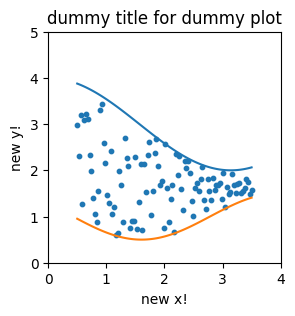

In [47]:
fig.get_figure()